In [ ]:
!pip install sqlalchemy

In [ ]:
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
    host="localhost",       # or your MySQL server IP
    user="root",            # your username
    password="admin@123",# your password
    database="jotstar_db"      # your database name
)

cursor = conn.cursor()

# Run a query
cursor.execute("SELECT * FROM contents")

content = []
for row in cursor.fetchall():
    content.append(row)

cursor.execute("SELECT * FROM subscribers")

subscribers = []
for row in cursor.fetchall():
    subscribers.append(row)

cursor.execute("SELECT * FROM content_consumption")

content_consumption = []
for row in cursor.fetchall():
    content_consumption.append(row)

# SELECT * FROM liocinema_db.content_consumption;
content_consumption_df = pd.DataFrame(data = content_consumption, columns = ['user_id', 'device_type', 'total_watch_time_mins'])
content_df = pd.DataFrame(data = content, columns= ['content_id',"content_type", 'language', 'genre', 'runtime' ])
subscribers_df = pd.DataFrame(data = subscribers, columns= ['user_id', 'age_group', 'city_tier', 'subscription_date', 'subscription_plan', 'last_active_date', 'plan_change_date', 'new_subscription_plan' ])
# Close connection
cursor.close()
conn.close()

In [ ]:
from sqlalchemy import create_engine
import pandas as pd

  # or content_df, etc.

# Define your MySQL connection details
user = "root"
password = "admin%40123"
host = "localhost"
port = 3306
database = "jotstar_db"

# Construct connection string
db_uri = f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}"

# Create engine
engine = create_engine(db_uri)

content_consumption_df.to_sql(
    name="content_consumption",
    con=engine,
    if_exists="replace",
    index=False
)

In [ ]:
pd.read_sql_table(con=conn, table_name='content_consumption')

In [ ]:
subscribers

In [ ]:
content_consumption_df.to_sql()

In [ ]:
content_consumption_df

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Data Ingestion/Data Loading

In [59]:
subscribers_df = pd.read_csv(r"D:\Python\data analytics project\subscribers.csv", index_col="Unnamed: 0")
content_consumption_df = pd.read_csv(r"D:\Python\data analytics project\content_consumption.csv", index_col="Unnamed: 0")
content_df = pd.read_csv(r"D:\Python\data analytics project\content.csv", index_col="Unnamed: 0")


In [7]:
subscribers_df.head()

,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan
0,UIDJS0000751588f,18-24,Tier 1,2024-06-10,Premium,NaN,NaN,NaN
1,UIDJS000093eeb86,18-24,Tier 1,2024-11-09,Free,NaN,NaN,NaN
2,UIDJS00010d7fa1e,25-34,Tier 1,2024-08-08,Free,NaN,NaN,NaN
3,UIDJS00013411a85,35-44,Tier 2,2024-05-31,VIP,NaN,NaN,NaN
4,UIDJS0003a3f54cf,35-44,Tier 1,2024-09-20,Premium,NaN,NaN,NaN


In [8]:
content_df.head()

,content_id,content_type,language,genre,runtime
0,CJSMBEACT2e633,Movie,Bengali,Action,90
1,CJSMBEACT34aec,Movie,Bengali,Action,135
2,CJSMBEACT83b46,Movie,Bengali,Action,120
3,CJSMBECOM12e7a,Movie,Bengali,Comedy,120
4,CJSMBECOM5431a,Movie,Bengali,Comedy,135


In [9]:
content_consumption_df.head()

,user_id,device_type,total_watch_time_mins
0,UIDJS877cc0e02c9,Mobile,14613
1,UIDJS06384e7ff06,Mobile,13271
2,UIDJSc3997b7beb7,Mobile,4644
3,UIDJS66726ce2325,Mobile,5734
4,UIDJS040119b6107,Mobile,2939


In [10]:
content_consumption_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133860 entries, 0 to 133859
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   user_id                133860 non-null  object
 1   device_type            133860 non-null  object
 2   total_watch_time_mins  133860 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.1+ MB


In [11]:
content_consumption_df['total_watch_time_hrs']= content_consumption_df['total_watch_time_mins'].apply(lambda x: round(x/60,2))

In [12]:
content_consumption_df.head()

,user_id,device_type,total_watch_time_mins,total_watch_time_hrs
0,UIDJS877cc0e02c9,Mobile,14613,243.55
1,UIDJS06384e7ff06,Mobile,13271,221.18
2,UIDJSc3997b7beb7,Mobile,4644,77.40
3,UIDJS66726ce2325,Mobile,5734,95.57
4,UIDJS040119b6107,Mobile,2939,48.98


In [13]:
content_consumption_df['device_type'].unique()

array(['Mobile', 'TV', 'Laptop'], dtype=object)

In [14]:
import seaborn as sns

content_consumption_avg = content_consumption_df.groupby('device_type').mean('total_watch_time_hrs')
# content_consumption_avg = content_consumption_avg.reset_index()
content_consumption_avg

,total_watch_time_mins,total_watch_time_hrs
device_type,,
Laptop,4857.260399,80.954355
Mobile,10563.645316,176.060766
TV,5682.622277,94.710375


<Axes: xlabel='device_type', ylabel='total_watch_time_mins'>

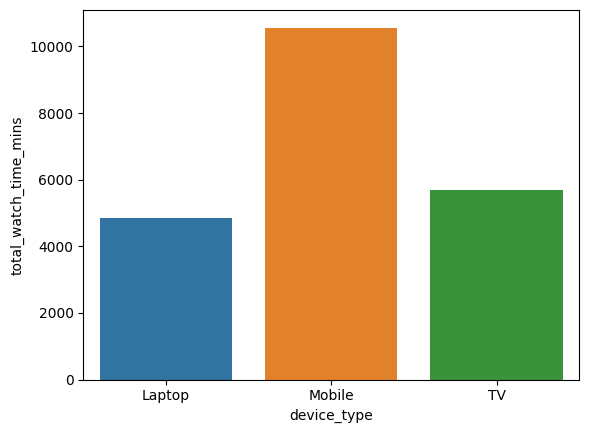

In [15]:
sns.barplot(data=content_consumption_avg, x = 'device_type', y='total_watch_time_mins', hue='device_type')

In [16]:
content_df

,content_id,content_type,language,genre,runtime
0,CJSMBEACT2e633,Movie,Bengali,Action,90
1,CJSMBEACT34aec,Movie,Bengali,Action,135
2,CJSMBEACT83b46,Movie,Bengali,Action,120
3,CJSMBECOM12e7a,Movie,Bengali,Comedy,120
4,CJSMBECOM5431a,Movie,Bengali,Comedy,135
...,...,...,...,...,...
2355,CJSSTETHR767c0,Series,Telugu,Thriller,20
2356,CJSSTETHR8b80e,Series,Telugu,Thriller,30
2357,CJSSTETHR92817,Series,Telugu,Thriller,45
2358,CJSSTETHRccd4d,Series,Telugu,Thriller,30


In [17]:
subscribers_df


,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan
0,UIDJS0000751588f,18-24,Tier 1,2024-06-10,Premium,NaN,NaN,NaN
1,UIDJS000093eeb86,18-24,Tier 1,2024-11-09,Free,NaN,NaN,NaN
2,UIDJS00010d7fa1e,25-34,Tier 1,2024-08-08,Free,NaN,NaN,NaN
3,UIDJS00013411a85,35-44,Tier 2,2024-05-31,VIP,NaN,NaN,NaN
4,UIDJS0003a3f54cf,35-44,Tier 1,2024-09-20,Premium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
44615,UIDJSfffbb38249e,25-34,Tier 2,2024-11-12,Free,NaN,NaN,NaN
44616,UIDJSfffbd759005,45+,Tier 1,2024-05-21,VIP,NaN,NaN,NaN
44617,UIDJSfffebd3002b,25-34,Tier 1,2024-09-27,VIP,2024-10-29,NaN,NaN
44618,UIDJSffff6698084,35-44,Tier 3,2024-10-12,VIP,NaN,NaN,NaN


### Content Library Analysis: A detailed comparison of content types across both platforms.

* IN both the platforms we observed that customers are having more 
watchtime on Mobile device then Tv where as laptop has least watchtime

# Subscriber Insights: Analyse trends in subscriber acquisition and demographic variations.

In [18]:
subscribers_df.head()

,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan
0,UIDJS0000751588f,18-24,Tier 1,2024-06-10,Premium,NaN,NaN,NaN
1,UIDJS000093eeb86,18-24,Tier 1,2024-11-09,Free,NaN,NaN,NaN
2,UIDJS00010d7fa1e,25-34,Tier 1,2024-08-08,Free,NaN,NaN,NaN
3,UIDJS00013411a85,35-44,Tier 2,2024-05-31,VIP,NaN,NaN,NaN
4,UIDJS0003a3f54cf,35-44,Tier 1,2024-09-20,Premium,NaN,NaN,NaN


In [19]:

subscribers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44620 entries, 0 to 44619
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   user_id                44620 non-null  object
 1   age_group              44620 non-null  object
 2   city_tier              44620 non-null  object
 3   subscription_date      44620 non-null  object
 4   subscription_plan      44620 non-null  object
 5   last_active_date       6652 non-null   object
 6   plan_change_date       7090 non-null   object
 7   new_subscription_plan  7090 non-null   object
dtypes: object(8)
memory usage: 3.1+ MB


In [69]:
subscribers_df['subscription_date'] = pd.to_datetime(subscribers_df['subscription_date'])
subscribers_df['last_active_date'] = pd.to_datetime(subscribers_df['last_active_date'])
subscribers_df['plan_change_date'] = pd.to_datetime(subscribers_df['plan_change_date'])

In [21]:
subscribers_df.dtypes


user_id                          object
age_group                        object
city_tier                        object
subscription_date        datetime64[ns]
subscription_plan                object
last_active_date         datetime64[ns]
plan_change_date         datetime64[ns]
new_subscription_plan            object
dtype: object

In [22]:
sub_plan_vs_age = subscribers_df.groupby('age_group').value_counts(['subscription_plan']).to_frame().reset_index()

In [23]:
sub_plan_vs_age

,age_group,subscription_plan,count
0,18-24,VIP,3252
1,18-24,Premium,2305
2,18-24,Free,2119
3,25-34,VIP,8673
4,25-34,Premium,5938
5,25-34,Free,5458
6,35-44,VIP,4846
7,35-44,Premium,3417
8,35-44,Free,3011
9,45+,VIP,2386


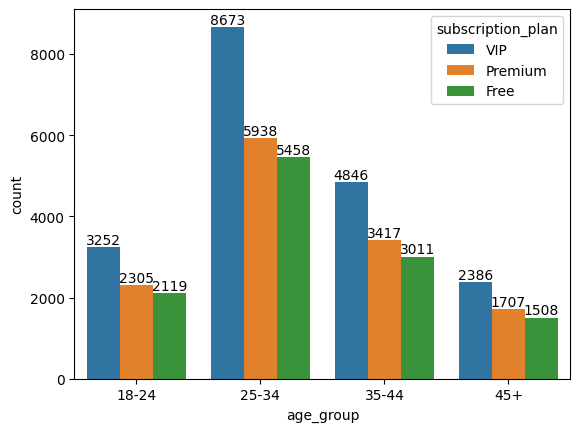

In [24]:
ax = sns.barplot(data = sub_plan_vs_age, x = 'age_group',y='count',hue = 'subscription_plan',estimator=sum)

for container in ax.containers:
    ax.bar_label(container)
plt.show()


In [25]:
# 2386+1701+1508


In [26]:
subscribers_df.head(2)

,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan
0,UIDJS0000751588f,18-24,Tier 1,2024-06-10,Premium,NaT,NaT,NaN
1,UIDJS000093eeb86,18-24,Tier 1,2024-11-09,Free,NaT,NaT,NaN


In [27]:
subscription_data = subscribers_df.groupby(['subscription_date'])['user_id'].count().to_frame().reset_index()
subscription_data

,subscription_date,user_id
0,2024-01-01,116
1,2024-01-02,137
2,2024-01-03,133
3,2024-01-04,135
4,2024-01-05,126
...,...,...
330,2024-11-26,145
331,2024-11-27,134
332,2024-11-28,138
333,2024-11-29,156


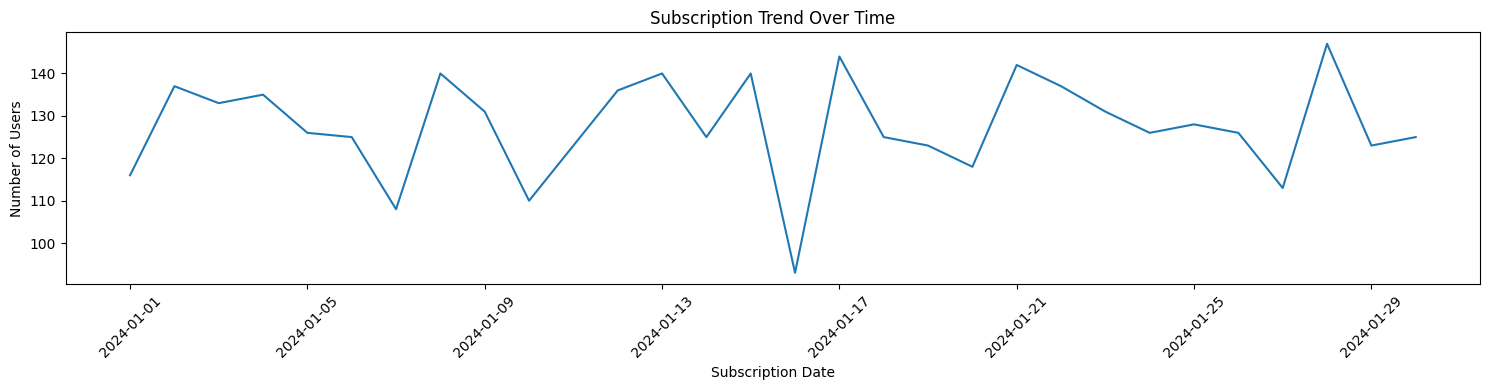

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 4)) 
sns.lineplot(data=subscription_data.head(30), x='subscription_date', y ='user_id', markers='*')
plt.title("Subscription Trend Over Time")
plt.xlabel("Subscription Date")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
plan_changed_cus = subscribers_df[['user_id','plan_change_date','subscription_plan','new_subscription_plan']].dropna()

In [30]:
plan_changed_cus.head(10)

,user_id,plan_change_date,subscription_plan,new_subscription_plan
12,UIDJS000cd6a7fe8,2024-12-18,Premium,VIP
19,UIDJS0019b04b32f,2024-08-11,VIP,Free
23,UIDJS001defd7e03,2024-08-18,VIP,Free
47,UIDJS003cb5a2cd7,2024-10-05,VIP,Free
58,UIDJS004c0eb4154,2024-09-26,VIP,Free
59,UIDJS004d1ca89e3,2024-08-31,VIP,Free
74,UIDJS005f238dbb0,2024-08-03,Premium,Free
76,UIDJS006315e24bf,2024-03-04,Free,Premium
77,UIDJS0063b1fe9a3,2024-07-25,VIP,Free
81,UIDJS006711c9331,2024-06-22,Free,VIP


In [31]:
rank = {"Free": 1, "Premium": 2, "VIP": 3}

def cus_plan_change(old_plan, new_plan):

    if rank[new_plan] > rank[old_plan]:
        return "Upgrade"
    elif rank[new_plan] < rank[old_plan]:
        return "Downgrade"
    else:
        return "No Change"

plan_changed_cus['cus_plan_changed'] = plan_changed_cus.apply(lambda rows: cus_plan_change(rows['subscription_plan'], rows['new_subscription_plan']), axis=1)


In [32]:
plan_changed_cus['subscription_plan'].unique()

array(['Premium', 'VIP', 'Free'], dtype=object)

In [33]:
plan_changed_cus

,user_id,plan_change_date,subscription_plan,new_subscription_plan,cus_plan_changed
12,UIDJS000cd6a7fe8,2024-12-18,Premium,VIP,Upgrade
19,UIDJS0019b04b32f,2024-08-11,VIP,Free,Downgrade
23,UIDJS001defd7e03,2024-08-18,VIP,Free,Downgrade
47,UIDJS003cb5a2cd7,2024-10-05,VIP,Free,Downgrade
58,UIDJS004c0eb4154,2024-09-26,VIP,Free,Downgrade
...,...,...,...,...,...
44598,UIDJSffd997ae360,2024-08-28,VIP,Free,Downgrade
44600,UIDJSffdbd91a9cb,2024-08-11,VIP,Premium,Downgrade
44601,UIDJSffdd37f5584,2024-08-04,Premium,VIP,Upgrade
44602,UIDJSffe11ff87fb,2024-05-16,VIP,Free,Downgrade


In [34]:
plan_changed_cus_grp = plan_changed_cus.groupby('plan_change_date').value_counts(['cus_plan_changed']).to_frame().reset_index()

In [35]:
plan_changed_cus

,user_id,plan_change_date,subscription_plan,new_subscription_plan,cus_plan_changed
12,UIDJS000cd6a7fe8,2024-12-18,Premium,VIP,Upgrade
19,UIDJS0019b04b32f,2024-08-11,VIP,Free,Downgrade
23,UIDJS001defd7e03,2024-08-18,VIP,Free,Downgrade
47,UIDJS003cb5a2cd7,2024-10-05,VIP,Free,Downgrade
58,UIDJS004c0eb4154,2024-09-26,VIP,Free,Downgrade
...,...,...,...,...,...
44598,UIDJSffd997ae360,2024-08-28,VIP,Free,Downgrade
44600,UIDJSffdbd91a9cb,2024-08-11,VIP,Premium,Downgrade
44601,UIDJSffdd37f5584,2024-08-04,Premium,VIP,Upgrade
44602,UIDJSffe11ff87fb,2024-05-16,VIP,Free,Downgrade


In [36]:
plan_changed_cus_grp.head()

,plan_change_date,cus_plan_changed,count
0,2024-02-01,Downgrade,7
1,2024-02-02,Downgrade,7
2,2024-02-02,Upgrade,3
3,2024-02-03,Upgrade,6
4,2024-02-03,Downgrade,5


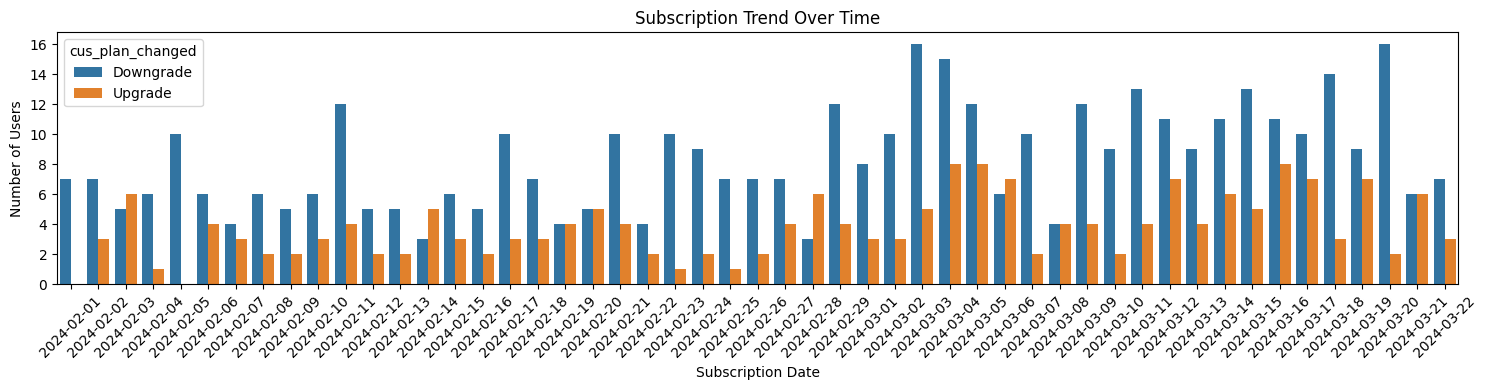

In [37]:

fig, ax = plt.subplots(figsize=(15, 4)) 
sns.barplot(data=plan_changed_cus_grp.head(100), x='plan_change_date', y='count', hue='cus_plan_changed')
plt.title("Subscription Trend Over Time")
plt.xlabel("Subscription Date")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
# Instead of looking into day wise --> quarter wise or monthly wise

plan_changed_cus_grp["plan_change_month"] = plan_changed_cus_grp['plan_change_date'].dt.strftime(date_format="%Y-%m")

In [39]:
plan_changed_cus_grp

,plan_change_date,cus_plan_changed,count,plan_change_month
0,2024-02-01,Downgrade,7,2024-02
1,2024-02-02,Downgrade,7,2024-02
2,2024-02-02,Upgrade,3,2024-02
3,2024-02-03,Upgrade,6,2024-02
4,2024-02-03,Downgrade,5,2024-02
...,...,...,...,...
661,2024-12-29,Upgrade,4,2024-12
662,2024-12-30,Downgrade,26,2024-12
663,2024-12-30,Upgrade,5,2024-12
664,2024-12-31,Downgrade,14,2024-12


In [40]:
plan_changed_cus_mnt_df = plan_changed_cus_grp.groupby(['plan_change_month','cus_plan_changed'])['count'].sum().to_frame().reset_index()

In [41]:
plan_changed_cus_mnt_df

,plan_change_month,cus_plan_changed,count
0,2024-02,Downgrade,193
1,2024-02,Upgrade,83
2,2024-03,Downgrade,322
3,2024-03,Upgrade,149
4,2024-04,Downgrade,380
5,2024-04,Upgrade,157
6,2024-05,Downgrade,416
7,2024-05,Upgrade,180
8,2024-06,Downgrade,437
9,2024-06,Upgrade,178


5. Downgrade Patterns: Analysis of subscription downgrades and associated trends.

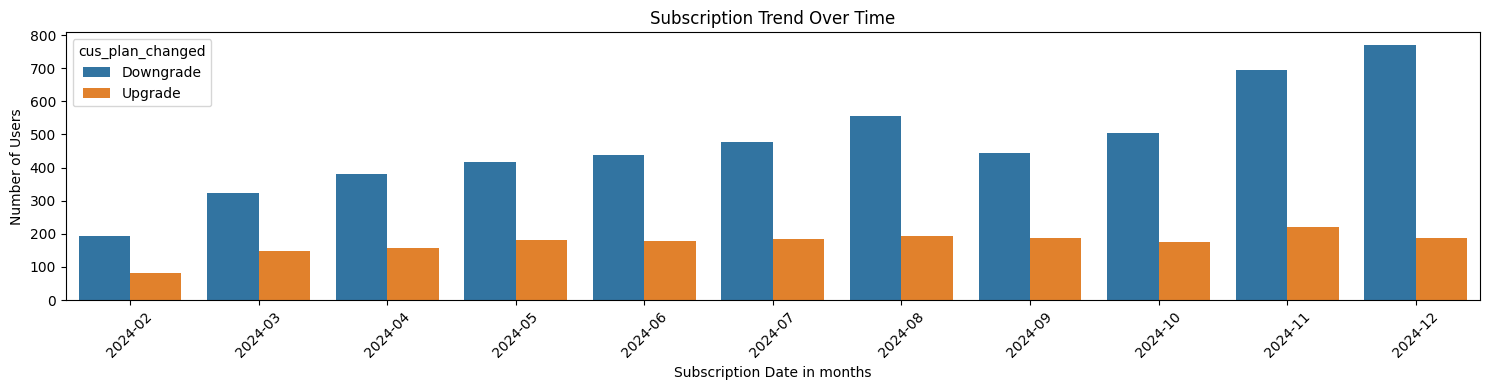

In [42]:
fig, ax = plt.subplots(figsize=(15, 4)) 
sns.barplot(data=plan_changed_cus_mnt_df, x='plan_change_month', y='count', hue='cus_plan_changed')
plt.title("Subscription Trend Over Time")
plt.xlabel("Subscription Date in months")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Assignment :
1) Content Consumption Behavior: Patterns in total watch time, device preferences, and variations by user demographics.
2) what cause downgrade
    -Hint: combine content_consumption_df and subscribers_df


In [43]:
subscribers_df.head()

,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan
0,UIDJS0000751588f,18-24,Tier 1,2024-06-10,Premium,NaT,NaT,NaN
1,UIDJS000093eeb86,18-24,Tier 1,2024-11-09,Free,NaT,NaT,NaN
2,UIDJS00010d7fa1e,25-34,Tier 1,2024-08-08,Free,NaT,NaT,NaN
3,UIDJS00013411a85,35-44,Tier 2,2024-05-31,VIP,NaT,NaT,NaN
4,UIDJS0003a3f54cf,35-44,Tier 1,2024-09-20,Premium,NaT,NaT,NaN


In [44]:
content_consumption_df.head()

,user_id,device_type,total_watch_time_mins,total_watch_time_hrs
0,UIDJS877cc0e02c9,Mobile,14613,243.55
1,UIDJS06384e7ff06,Mobile,13271,221.18
2,UIDJSc3997b7beb7,Mobile,4644,77.40
3,UIDJS66726ce2325,Mobile,5734,95.57
4,UIDJS040119b6107,Mobile,2939,48.98


In [45]:
subscribers_df.head()

,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan
0,UIDJS0000751588f,18-24,Tier 1,2024-06-10,Premium,NaT,NaT,NaN
1,UIDJS000093eeb86,18-24,Tier 1,2024-11-09,Free,NaT,NaT,NaN
2,UIDJS00010d7fa1e,25-34,Tier 1,2024-08-08,Free,NaT,NaT,NaN
3,UIDJS00013411a85,35-44,Tier 2,2024-05-31,VIP,NaT,NaT,NaN
4,UIDJS0003a3f54cf,35-44,Tier 1,2024-09-20,Premium,NaT,NaT,NaN


3. Inactivity Analysis: Patterns of inactivity across age groups, city tiers, and subscription plans.

In [46]:
subscribers_df.head()

,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan
0,UIDJS0000751588f,18-24,Tier 1,2024-06-10,Premium,NaT,NaT,NaN
1,UIDJS000093eeb86,18-24,Tier 1,2024-11-09,Free,NaT,NaT,NaN
2,UIDJS00010d7fa1e,25-34,Tier 1,2024-08-08,Free,NaT,NaT,NaN
3,UIDJS00013411a85,35-44,Tier 2,2024-05-31,VIP,NaT,NaT,NaN
4,UIDJS0003a3f54cf,35-44,Tier 1,2024-09-20,Premium,NaT,NaT,NaN


In [60]:
subscribers_df[subscribers_df['last_active_date'].notnull()]

,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan
9,UIDJS0005f952957,25-34,Tier 3,2024-09-29,VIP,2024-12-02,NaN,NaN
10,UIDJS00066780176,35-44,Tier 2,2024-08-14,Free,2024-10-05,NaN,NaN
11,UIDJS00095c87d92,35-44,Tier 1,2024-06-06,Premium,2024-07-22,NaN,NaN
16,UIDJS001420c2f0f,25-34,Tier 2,2024-04-25,VIP,2024-11-13,NaN,NaN
25,UIDJS00242dbc61e,35-44,Tier 2,2024-06-27,Free,2024-08-11,NaN,NaN
...,...,...,...,...,...,...,...,...
44590,UIDJSffd20bfdcdd,25-34,Tier 2,2024-05-13,Free,2024-09-29,NaN,NaN
44594,UIDJSffd59ae2d62,25-34,Tier 1,2024-04-20,VIP,2024-09-14,NaN,NaN
44604,UIDJSffe295528f7,25-34,Tier 2,2024-04-01,Free,2024-05-31,NaN,NaN
44614,UIDJSfff648eaa52,25-34,Tier 1,2024-02-28,Free,2024-09-12,NaN,NaN


In [62]:
active_customers = subscribers_df['last_active_date'].isnull().sum()
inactive_customers = subscribers_df['last_active_date'].notnull().sum()


In [ ]:
active_subscribers_df = subscribers_df[subscribers_df['last_active_date'].isnull()]
inactive_subscribers_df = subscribers_df[subscribers_df['last_active_date'].notnull()]

In [74]:
inactive_subscribers_df

,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan
9,UIDJS0005f952957,25-34,Tier 3,2024-09-29,VIP,2024-12-02,NaT,NaN
10,UIDJS00066780176,35-44,Tier 2,2024-08-14,Free,2024-10-05,NaT,NaN
11,UIDJS00095c87d92,35-44,Tier 1,2024-06-06,Premium,2024-07-22,NaT,NaN
16,UIDJS001420c2f0f,25-34,Tier 2,2024-04-25,VIP,2024-11-13,NaT,NaN
25,UIDJS00242dbc61e,35-44,Tier 2,2024-06-27,Free,2024-08-11,NaT,NaN
...,...,...,...,...,...,...,...,...
44590,UIDJSffd20bfdcdd,25-34,Tier 2,2024-05-13,Free,2024-09-29,NaT,NaN
44594,UIDJSffd59ae2d62,25-34,Tier 1,2024-04-20,VIP,2024-09-14,NaT,NaN
44604,UIDJSffe295528f7,25-34,Tier 2,2024-04-01,Free,2024-05-31,NaT,NaN
44614,UIDJSfff648eaa52,25-34,Tier 1,2024-02-28,Free,2024-09-12,NaT,NaN


In [77]:
6652*3

19956

In [76]:
content_consumption_df['user_id'].value_counts()

user_id
UIDJS877cc0e02c9    3
UIDJS06384e7ff06    3
UIDJSc3997b7beb7    3
UIDJS66726ce2325    3
UIDJS040119b6107    3
                   ..
UIDJS96f8e4a1b54    3
UIDJSa131c0a6199    3
UIDJS3f8a556df56    3
UIDJS7a51d1c2bcd    3
UIDJS44e851ffbd2    3
Name: count, Length: 44620, dtype: int64

In [78]:
complete_inactive_customers_df = pd.merge(left=inactive_subscribers_df,right=content_consumption_df, on='user_id', how='inner')


In [79]:
complete_inactive_customers_df.columns

Index(['user_id', 'age_group', 'city_tier', 'subscription_date',
       'subscription_plan', 'last_active_date', 'plan_change_date',
       'new_subscription_plan', 'device_type', 'total_watch_time_mins'],
      dtype='object')

<Axes: xlabel='age_group', ylabel='total_watch_time_mins'>

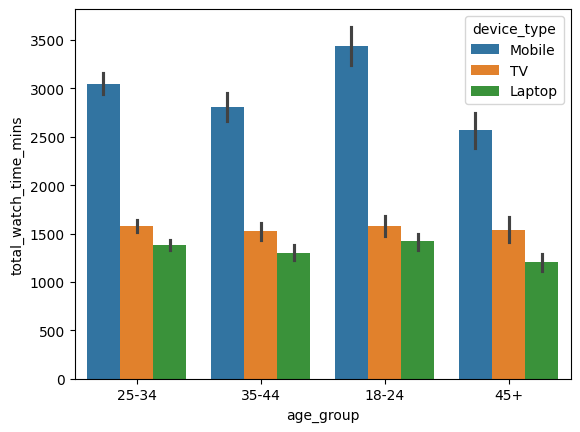

In [83]:
complete_inactive_customers_df.groupby(by=['age_group', 'device_type'])['total_watch_time_mins'].mean().to_frame()

sns.barplot(data=complete_inactive_customers_df, x='age_group', y='total_watch_time_mins', hue='device_type')

<Axes: xlabel='subscription_plan', ylabel='total_watch_time_mins'>

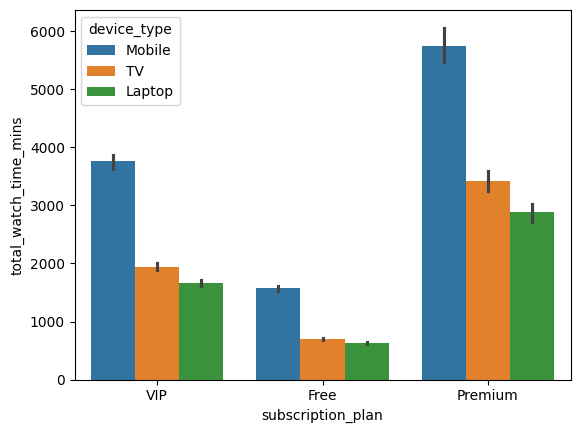

In [ ]:
complete_inactive_customers_df.groupby(by=['subscription_plan', 'device_type'])['total_watch_time_mins'].mean().to_frame()

sns.barplot(data=complete_inactive_customers_df, x='subscription_plan', y='total_watch_time_mins', hue='device_type')

In [ ]:
active_customers ,inactive_customers

# calculate the percentage 


(np.int64(37968), np.int64(6652))

In [66]:
subscribers_df.shape

(44620, 8)

In [64]:
subscribers_df['last_active_date'].notnull().sum()

np.int64(6652)

In [ ]:
import pandas as pd

In [ ]:
# blinkit_ord_df = pd.read_csv(r"E:\Python\Data analysis project\Raw_data\blinkit_orders.csv")
# blinkit_cus_fb_df = pd.read_csv(r"E:\Python\Data analysis project\Raw_data\blinkit_customer_feedback.csv")


In [ ]:
blinkit_ord_df.head()

In [ ]:
blinkit_cus_fb_df.head()

In [ ]:
blinkit_cus_fb_df.columns

In [ ]:
blinkit_ord_df.columns

In [ ]:
blinkit_ord_df.join(blinkit_cus_fb_df, on=['order_id','customer_id'], how='outer', rsuffix=['order_id','customer_id'])

In [ ]:
blinkit_ord_df.shape

In [ ]:
blinkit_cus_fb_df.shape

In [ ]:
final_df = pd.merge(left=blinkit_cus_fb_df,right=blinkit_ord_df,on=['order_id','customer_id'],how='inner')

In [ ]:
final_df.head()

In [ ]:
final_df.info()

In [ ]:
final_df['feedback_date'] = pd.to_datetime(final_df['feedback_date'])

In [ ]:
final_df['order_date'] = pd.to_datetime(final_df['order_date'])
final_df['promised_delivery_time'] = pd.to_datetime(final_df['promised_delivery_time'])  
final_df['actual_delivery_time'] = pd.to_datetime(final_df['actual_delivery_time'])  

In [ ]:
final_df.info()

In [ ]:
final_df.describe()

In [ ]:
final_df.describe(include='O')

In [ ]:
numerical_df = final_df.select_dtypes(exclude='O')
categorical_df = final_df.select_dtypes(include='O')

In [ ]:
import seaborn as sns

In [ ]:
numerical_df.columns

In [ ]:
numerical_df['rating'].value_counts().plot(kind='bar')

In [ ]:
sns.barplot(numerical_df['rating'].value_counts())

In [ ]:
final_df['rating'] = final_df['rating'].astype('O')

In [ ]:
sns.barplot(categorical_df['feedback_category'].value_counts())

In [ ]:
sns.countplot(data=final_df, x='feedback_category',hue='rating')

In [ ]:
final_df[['order_date','order_total']].plot(x='order_date',y='order_total')

In [ ]:
final_df[['order_date','order_total']].groupby(by='order_date').sum('order_total').plot()

In [ ]:
final_df[['order_date','order_total']]

In [ ]:
final_df['order_date'][0].month

In [ ]:
final_df['order_month'] = final_df['order_date'].apply(lambda row: row.month)

In [ ]:
final_df.head()

In [ ]:
monthly_sales = final_df[['order_month','order_total']].groupby(by='order_month').sum('order_total')

In [ ]:
monthly_sales.iloc[2:11]

In [ ]:
# final_df['order_date']

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 4)) 
sns.lineplot(data=monthly_sales, markers='*')
plt.show()